# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()
print(attrition_data.shape)

(1028, 34)


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [0]:
y = attrition_data['Attrition']
attrition_data.drop(['Attrition'], axis = 1, inplace = True)

In [5]:
attrition_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [6]:
attrition_data = attrition_data.apply(LabelEncoder().fit_transform)
attrition_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,23,2,498,2,0,1,1,0,0,1,0,64,2,1,7,3,2,573,717,8,1,0,0,0,0,8,0,0,6,4,0,5,0
1,31,1,88,1,7,0,1,0,1,2,1,31,1,1,6,1,1,494,951,1,0,12,1,3,1,10,3,2,10,7,1,7,1
2,19,2,649,1,1,1,4,0,2,3,1,62,1,0,2,2,2,45,16,6,1,4,0,1,0,7,3,2,0,0,0,0,2
3,15,1,660,1,2,3,1,0,3,3,0,26,2,0,6,2,1,231,878,1,1,0,0,2,0,8,3,2,8,7,3,0,3
4,9,2,243,1,1,0,3,0,4,0,1,10,2,0,2,1,1,292,603,9,0,1,0,3,1,6,3,2,2,2,2,2,4


In [7]:
attrition_data.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID                          0
dtype: int

In [26]:
X_train, X_test, y_train, y_test = train_test_split(attrition_data, y, test_size = 0.2, random_state = 123)

rfc = RandomForestClassifier(n_estimators = 20,
                             random_state = 123,
                             max_features = 4)
rfc.fit(X_train, y_train)
print(f"The training error is {mean_absolute_error(y_train, rfc.predict(X_train))}")
print(f"The training error is {mean_absolute_error(y_test, rfc.predict(X_test))}")

The training error is 0.006082725060827251
The training error is 0.1407766990291262


In [27]:
predictions = rfc.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

99.39 %


In [28]:
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

85.92 %


In [0]:
print(confusion_matrix(y_test, predictions))
print("="*55)
print(classification_report(y_test, predictions))

[[167   5]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       172
           1       0.44      0.12      0.19        34

    accuracy                           0.83       206
   macro avg       0.65      0.54      0.55       206
weighted avg       0.78      0.83      0.79       206



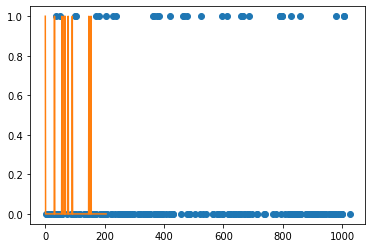

In [0]:
plt.plot(y_test, 'o')
plt.plot(rfc.predict(X_test))

Text(0.5, 1.0, 'Random Forest Classifier ROC curve')

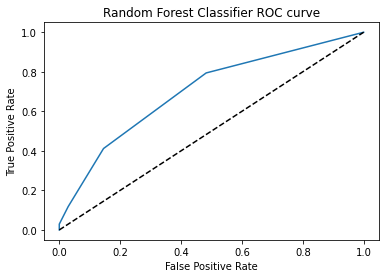

In [0]:
probab = rfc.predict_proba(X_test)
probab = probab[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probab) 
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC curve')

# **Extreme Gradient Boosting**


In [0]:
model = xgb.XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
prediction = model.predict(X_train)
accuracy = accuracy_score(y_train, prediction)
print(np.round(accuracy*100, 2), '%')

95.01 %


In [0]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

85.92 %


In [0]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[169   3]
 [ 26   8]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       172
           1       0.73      0.24      0.36        34

    accuracy                           0.86       206
   macro avg       0.80      0.61      0.64       206
weighted avg       0.84      0.86      0.83       206



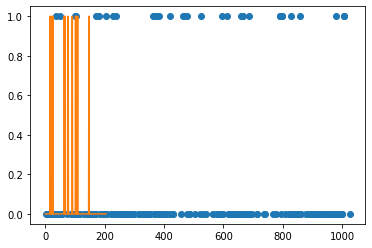

In [0]:
plt.plot(y_test, 'o')
plt.plot(model.predict(X_test))

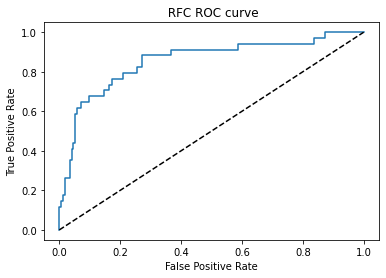

In [0]:
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' RFC ROC curve')
plt.show()

# **Gradient Boosting Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predictions = clf.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

86.13 %


In [0]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

86.41 %


In [0]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[171   1]
 [ 27   7]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       172
           1       0.88      0.21      0.33        34

    accuracy                           0.86       206
   macro avg       0.87      0.60      0.63       206
weighted avg       0.87      0.86      0.83       206



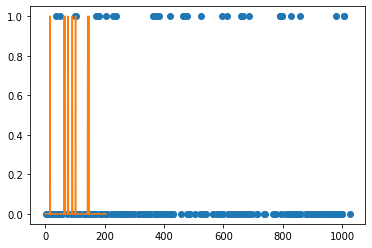

In [0]:
plt.plot(y_test, 'o')
plt.plot(clf.predict(X_test))

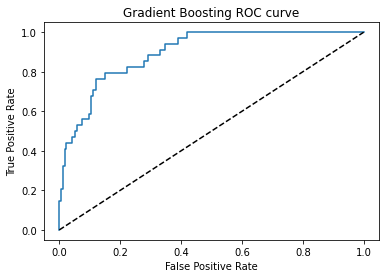

In [0]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC curve')
plt.show()